# Joint Bilateral Upsampling

许多图像处理方法，会将高分辨率图像降至低分辨率，再进行处理，节省运算与内存资源；处理完成后，再将结果 upsampling 回到高分辨率。  
这里的 Joint Bilateral Upsampling 使用原來高分辨率的灰阶影像作为参考，还原低分辩率的彩色结果回到高分辨率的图像。

### Bilateral Filters 

f: spatial (domain) filter kernel  
g: range filter kernel  
$ \Omega $ : spatial support of the kernel f  
$ k_p $ : normalizing factor

for some position p, 

$$
J_p = \frac{1}{k_p} \sum_{q \in \Omega} I_q \ \ 
f \Big( \Vert p - q \Vert \Big) \ \ 
g \Big( \Vert I_p - I_q \Vert \Big)
$$

$ \tilde{I} $ : guidance image

$$
J_p = \frac{1}{k_p} \sum_{q \in \Omega} I_q \ \ 
f \Big( \Vert p - q \Vert \Big) \ \ 
g \Big( \Vert \tilde{I}_p - \tilde{I}_q \Vert \Big)
$$

S : low resolution  
p, q : coordinates of pixels in $ \tilde{I} $  
$ p_{\downarrow} , q_{\downarrow} $ : corresponding coordinates in the low resolution solution S.

$$
\tilde{S}_p = \frac{1}{k_p} \sum_{q_{\downarrow} \in \Omega} S_{q \downarrow} \ \ 
f \Big( \Vert p_{\downarrow} - q_{\downarrow} \Vert \Big) \ \ 
g \Big( \Vert \tilde{I}_p - \tilde{I}_q \Vert \Big)
$$

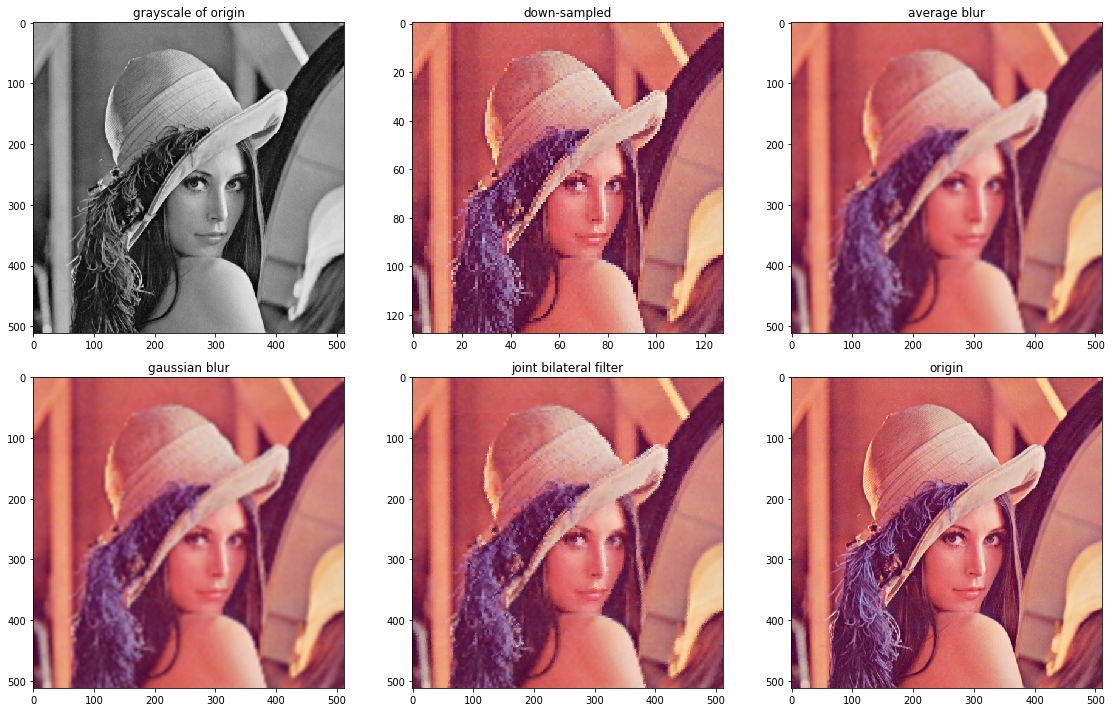

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
from scipy.misc import imread

ratio_s = 4
path_pic = '/Users/larrysu/repos/notebook/computer-vision/imgs/lena.tiff'

win = 7

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

pic_o = imread(path_pic)
pic_s = pic_o[::ratio_s,::ratio_s,:]
pic_g = rgb2gray(pic_o)
pic_u = scipy.ndimage.zoom(pic_s[:,:,:], (ratio_s,ratio_s,1), order=0)
pic_b_avg = cv2.blur(pic_u,(win,win))
pic_b_gau = cv2.GaussianBlur(pic_u,(win,win),3)

pic_j = np.array([pic_g,pic_g,pic_g], dtype=np.uint8).T
pic_jbf = cv2.ximgproc.jointBilateralFilter(joint=pic_j, src=pic_u, d=win, sigmaColor=5, sigmaSpace=3)

fig = plt.figure(figsize=(16, 10))
fig.add_subplot(2,3,1).set_title('grayscale of origin')
imgplot = plt.imshow(pic_g, cmap='gray')
fig.add_subplot(2,3,2).set_title('down-sampled')
imgplot = plt.imshow(pic_s)
fig.add_subplot(2,3,3).set_title('average blur')
imgplot = plt.imshow(pic_b_avg)
fig.add_subplot(2,3,4).set_title('gaussian blur')
imgplot = plt.imshow(pic_b_gau)
fig.add_subplot(2,3,5).set_title('joint bilateral filter')
imgplot = plt.imshow(pic_jbf)
fig.add_subplot(2,3,6).set_title('origin')
imgplot = plt.imshow(pic_o)

plt.tight_layout()
plt.show();